# <a href="https://thetahat.ru/courses/ph-ds-2024-aut">Phystech@DataScience</a>
## Семинар 8 (Часть 1)

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

In [1]:
# Bot check

# HW_ID: phds_sem8_1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import plot_tree

import scipy

sns.set(font_scale=1.8, palette='Set2')

# Простая часть

Сгенерируем данные.

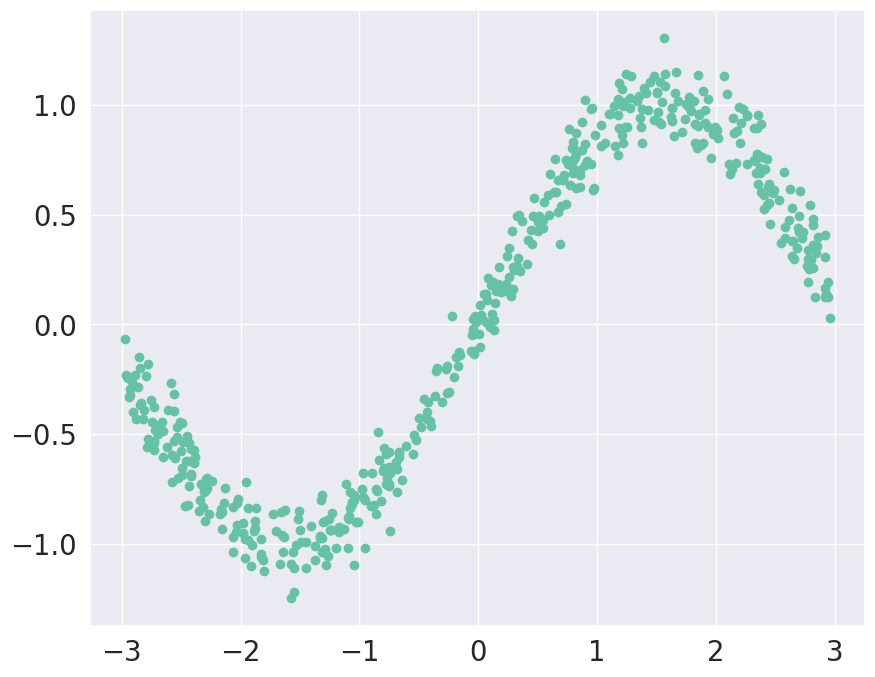

In [3]:
np.random.seed(42)
X_train = scipy.stats.uniform.rvs(loc=-3, scale = 6, size=(500, 1))
y_train = np.ravel(np.sin(X_train)) + scipy.stats.norm.rvs(scale=0.1, size=500)

plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train)

plt.show()

In [4]:
X_train.shape, y_train.shape

((500, 1), (500,))

Обучите градиентный бустинг `GradientBoostingRegressor` с параметром `learning_rate=1` и 10 деревьями.

In [5]:
regressor = GradientBoostingRegressor(learning_rate=1, n_estimators=10)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1, n_estimators=10)

Выведите параметры бустинга. Какие деревья используются в бустинге по умолчанию?

In [6]:
regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

**Ответ:**

Из `max_depth = 3` видно, что используются не очень глубокие деревья.

Нарисуйте первые 5 деревьев бустинга. Какие они?

In [7]:
regressor.estimators_.shape

(10, 1)

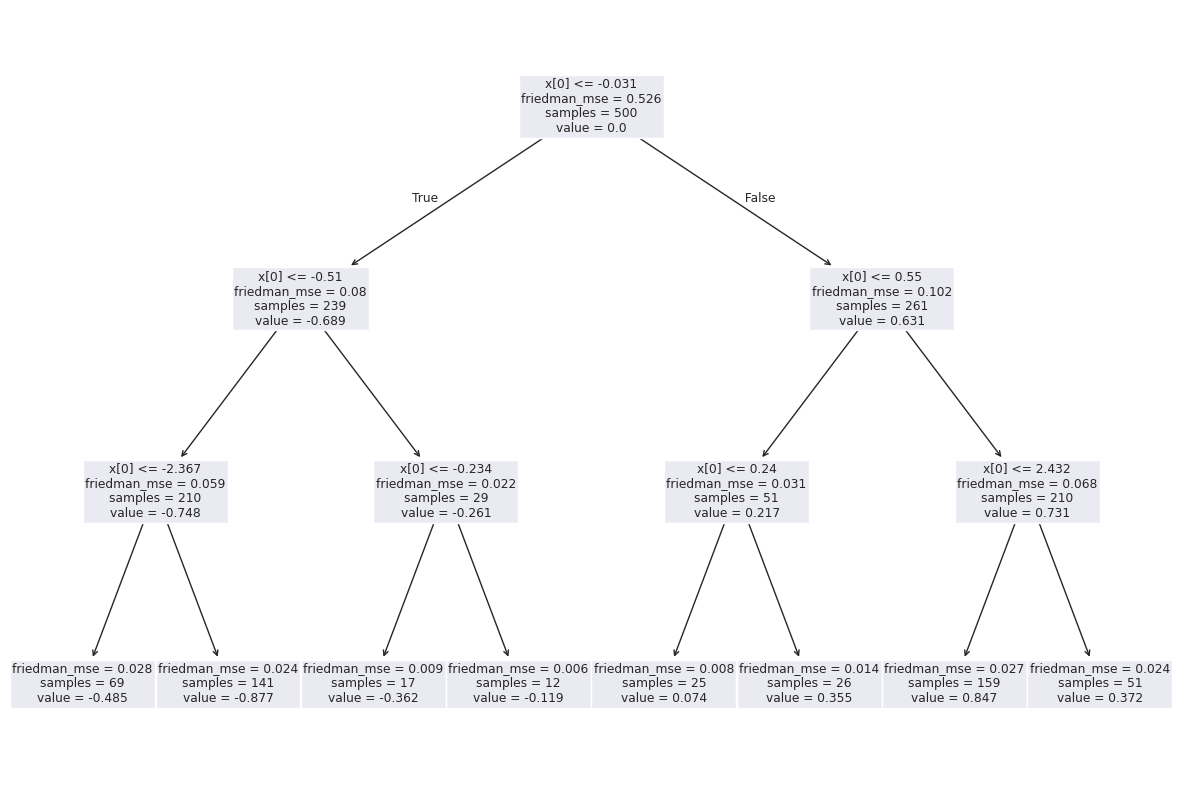

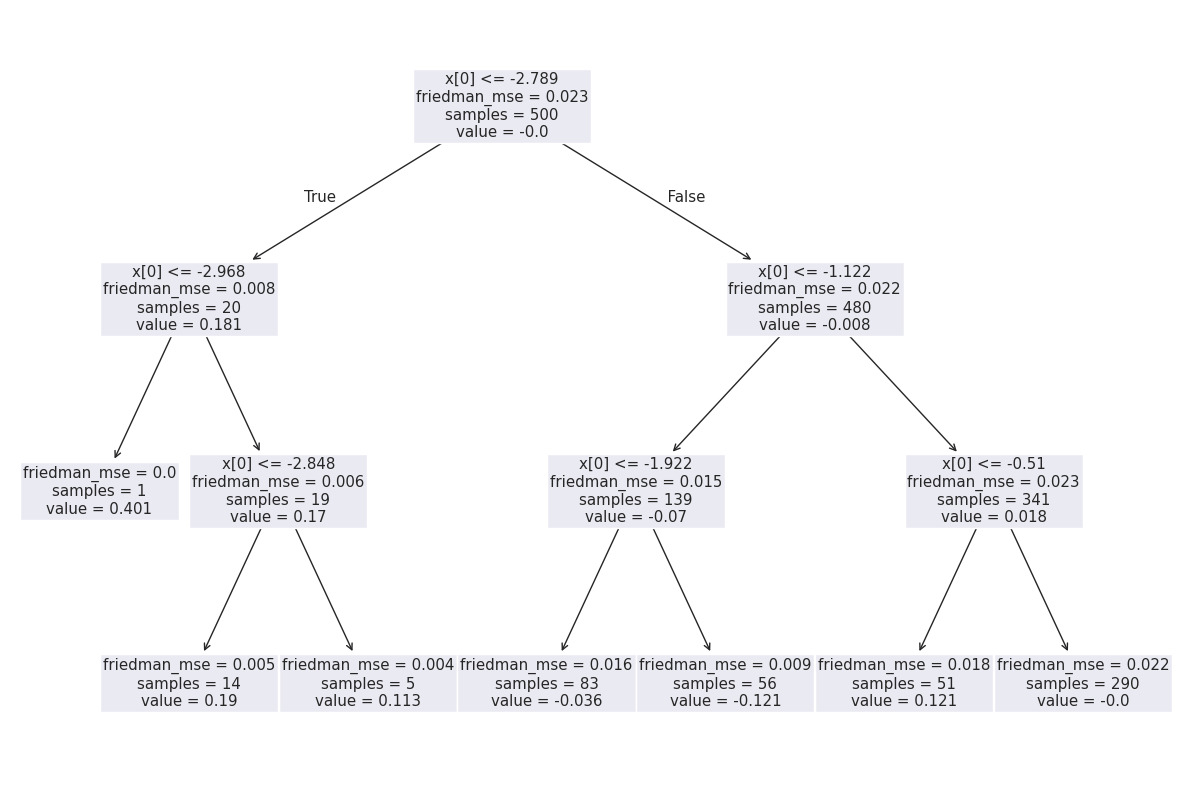

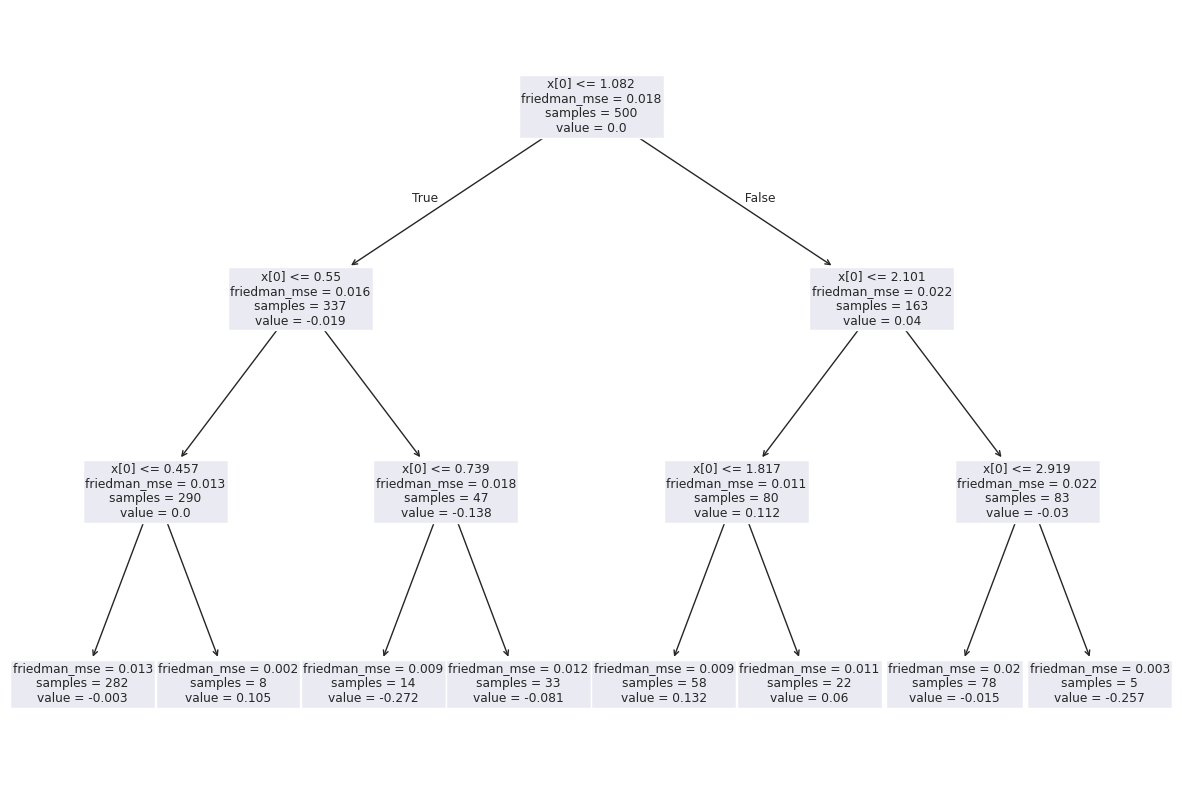

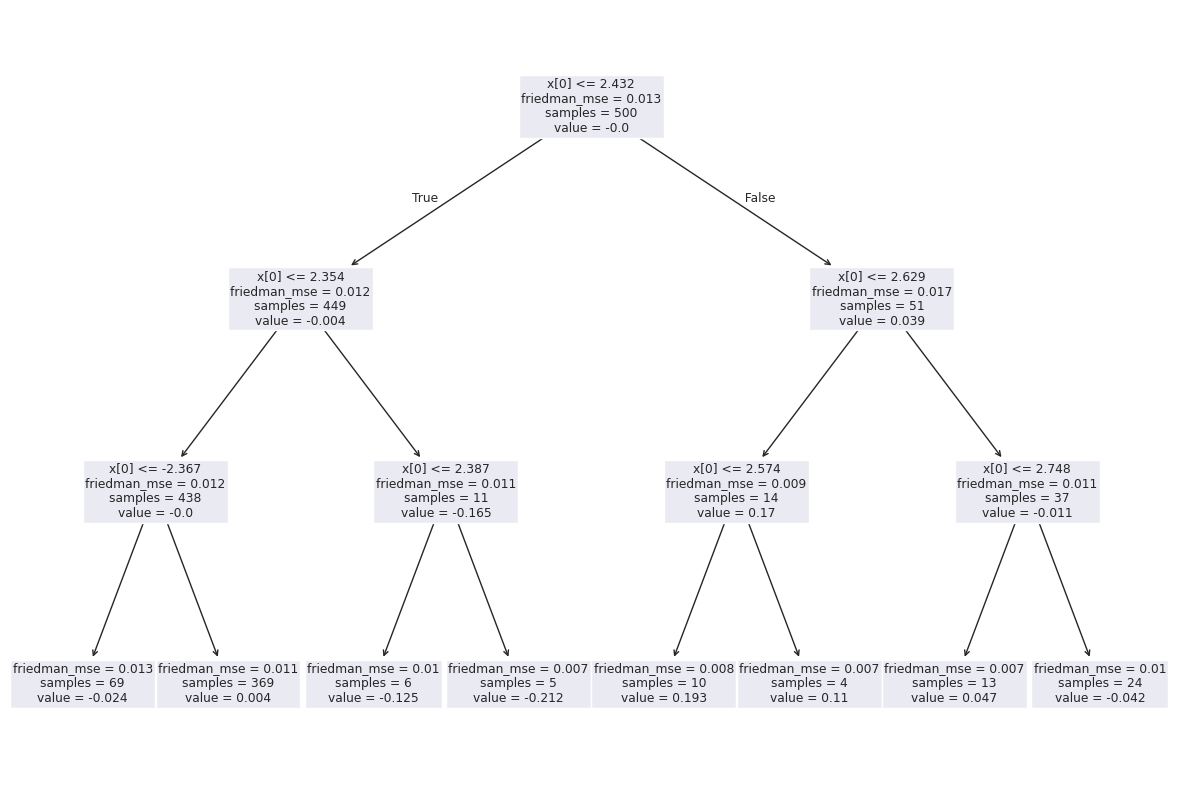

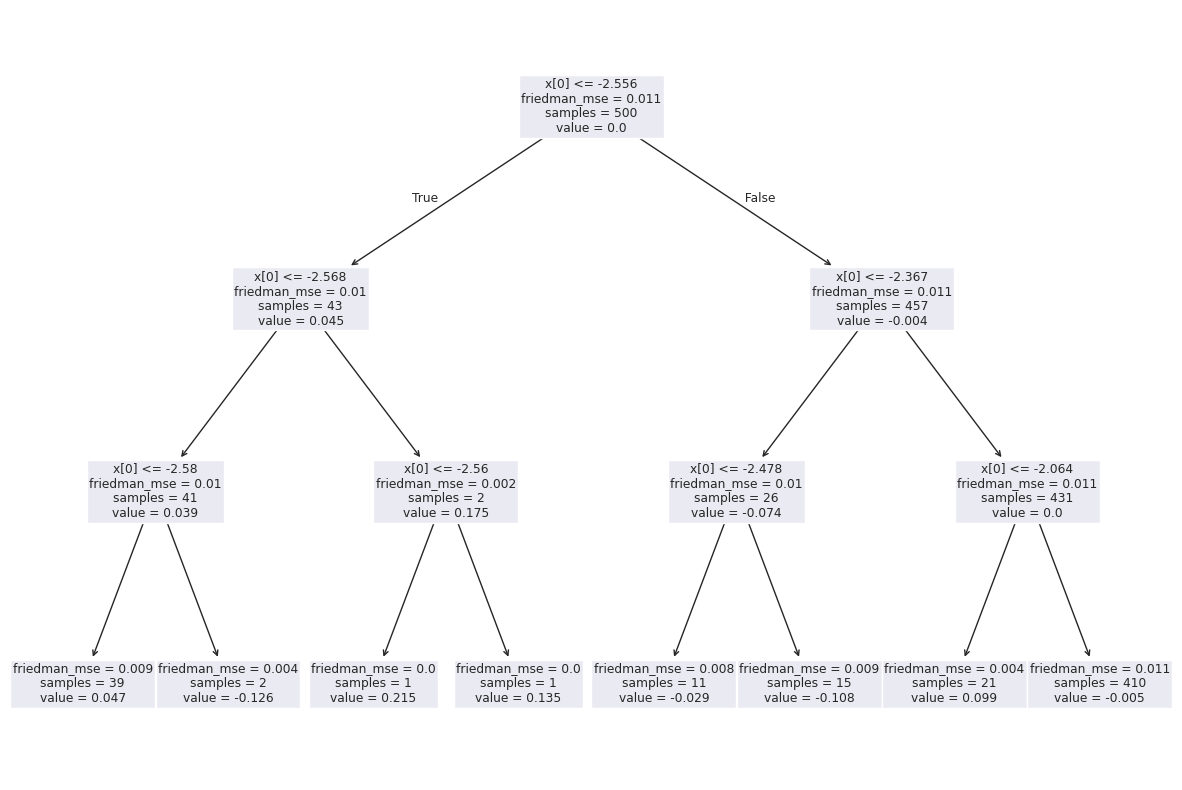

In [8]:
from sklearn.tree import plot_tree
for elem in regressor.estimators_[:5]:
    plt.figure(figsize=(15, 10))
    plot_tree(elem[0])

**Ответ:**

Снова видно, что деревья неглубокие, но почти все полностью разветвлены (глубина составляет 3, а число листьев — 7-8).

Разделение на узлах осуществляется по одной характеристике, причём, что интересно, по одной и той же.

У бустинга есть метод `staged_predict`. Он выдает предсказания композиции первых $i$ моделей бустинга. Используя этот метод, нарисуйте для каждого  $i$ два графика:
* График предсказаний первых $i$ моделей и истинных ответов;
* График ошибки на шаге $i$ и предсказаний $i$-й компоненты бустинга.

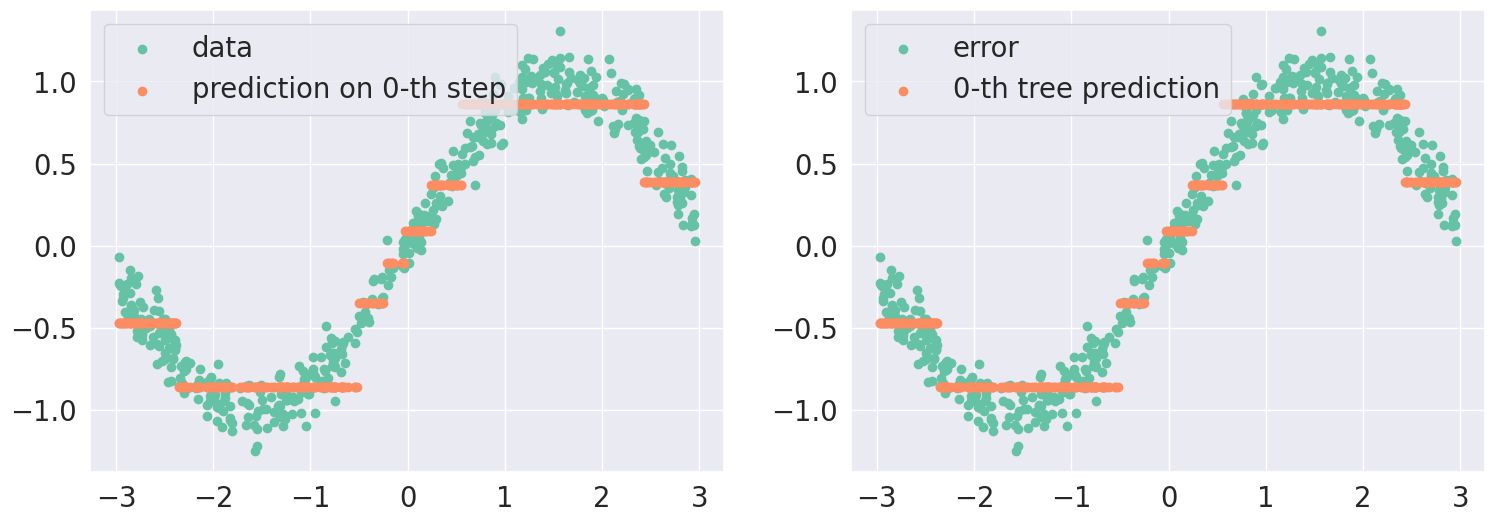

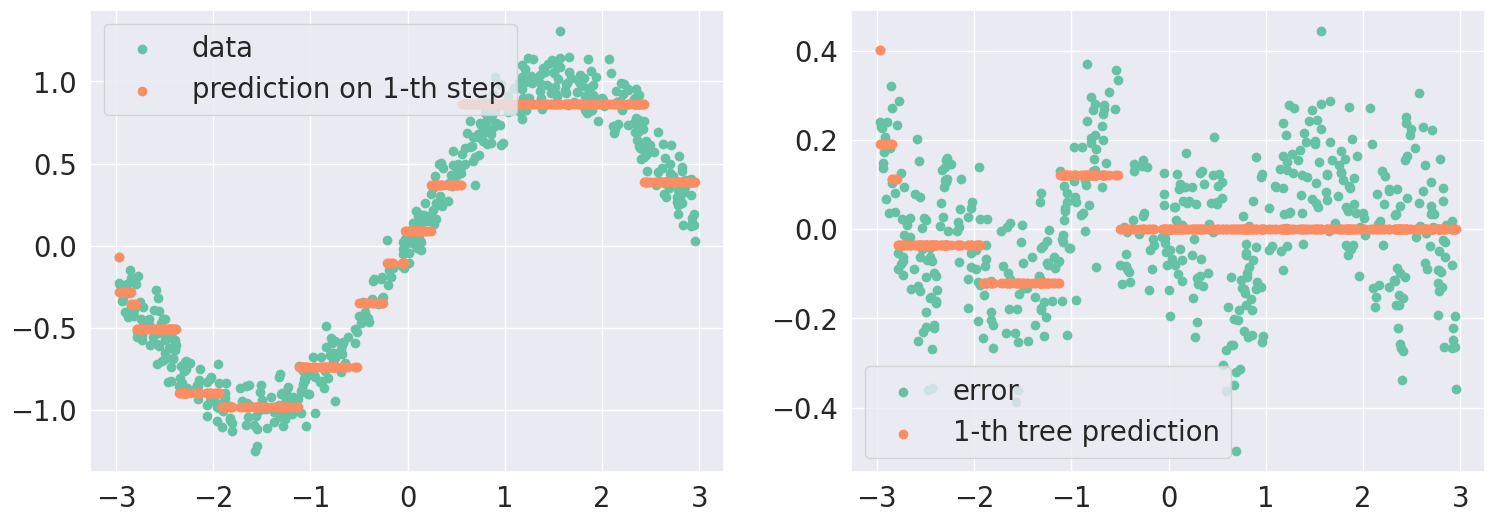

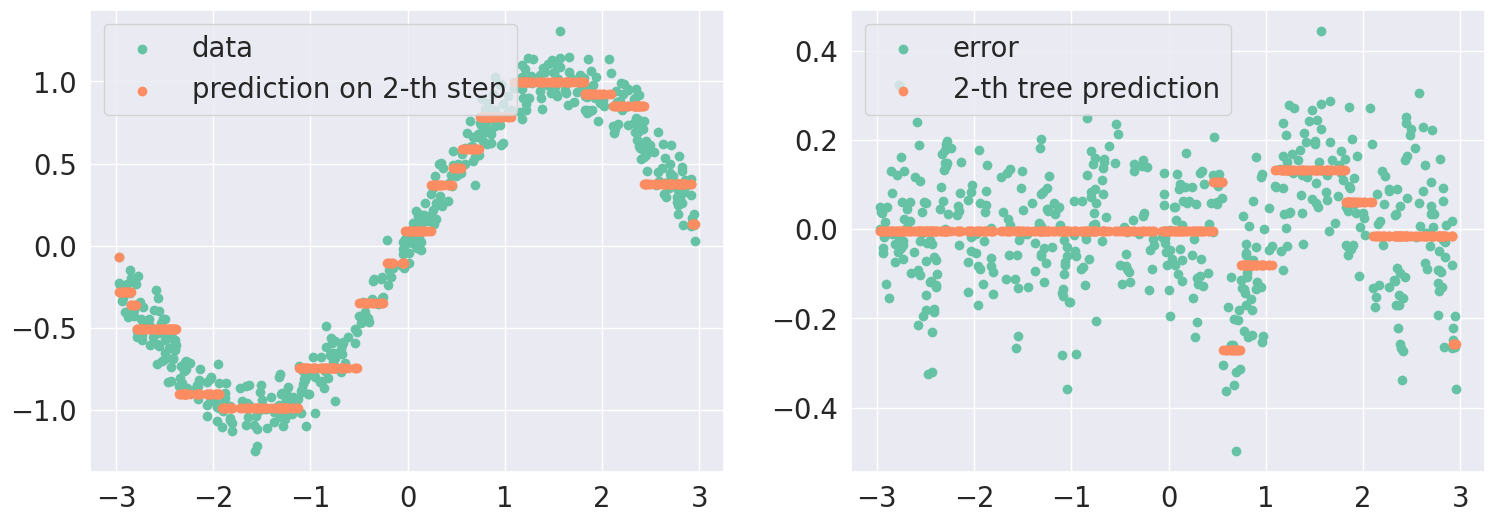

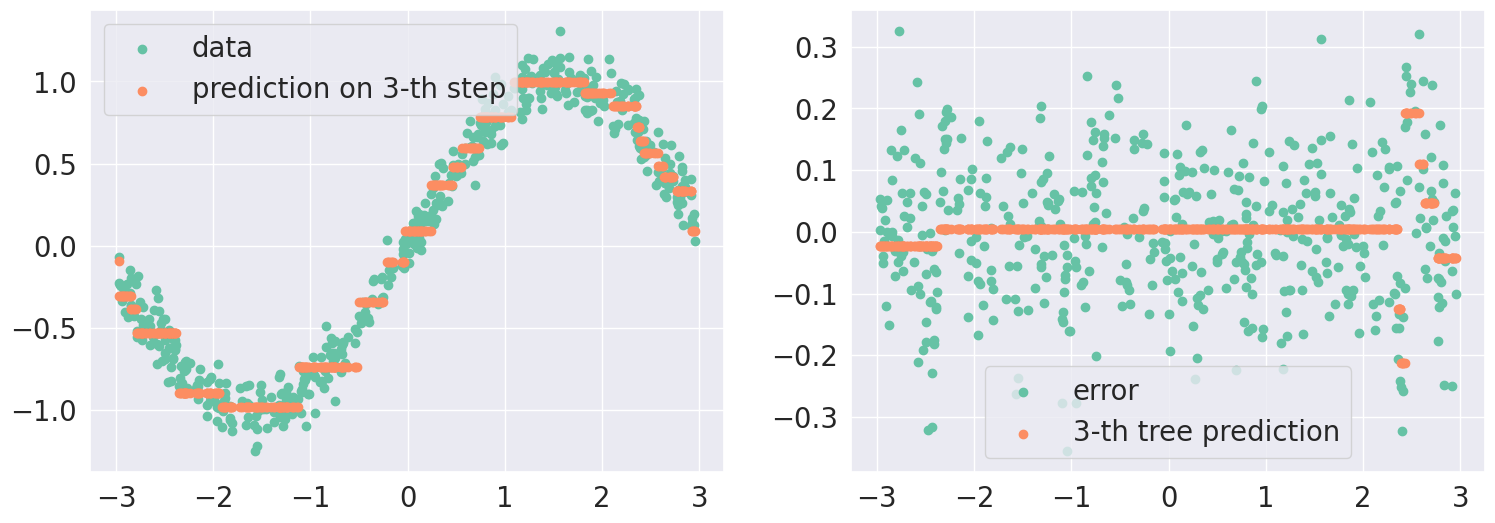

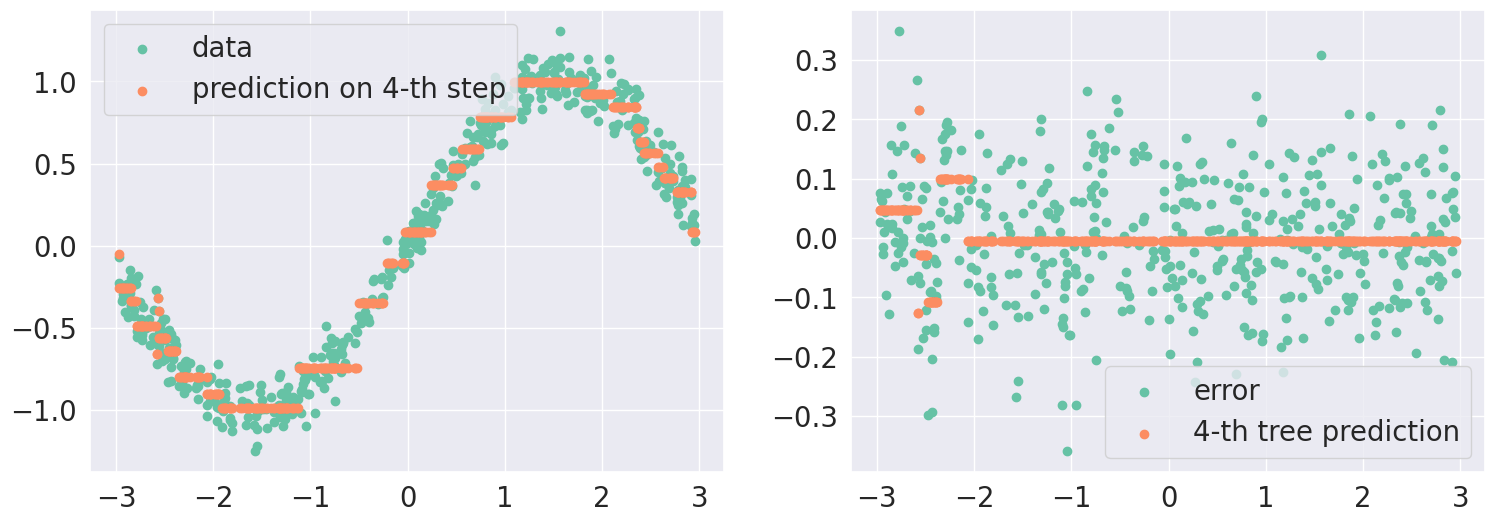

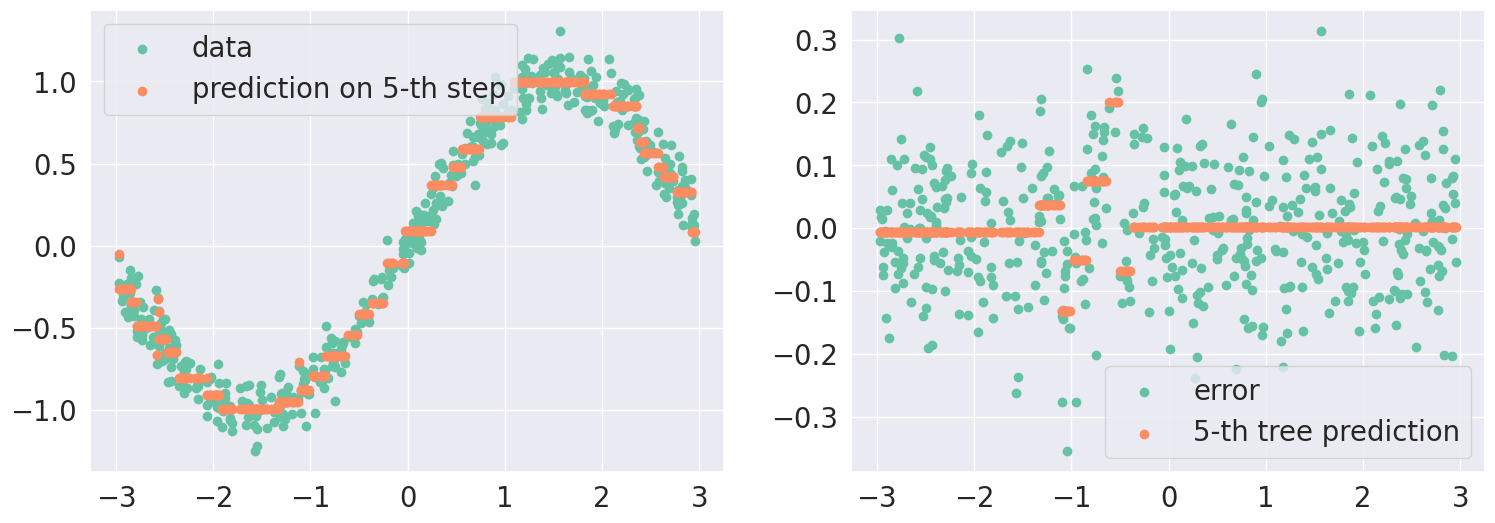

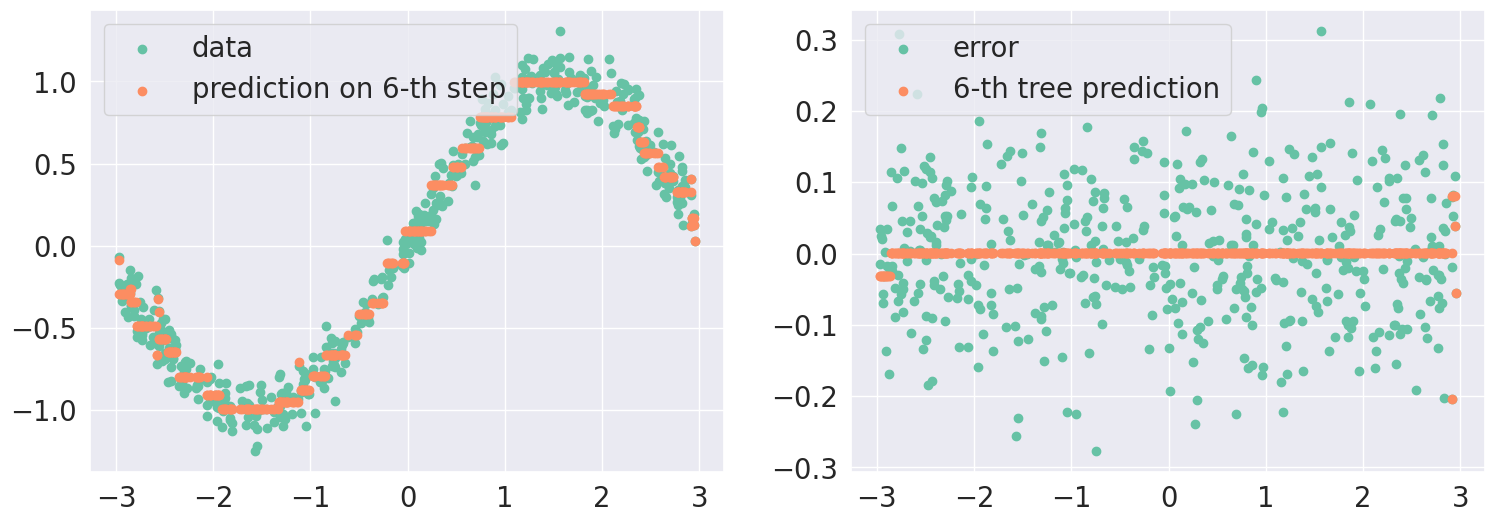

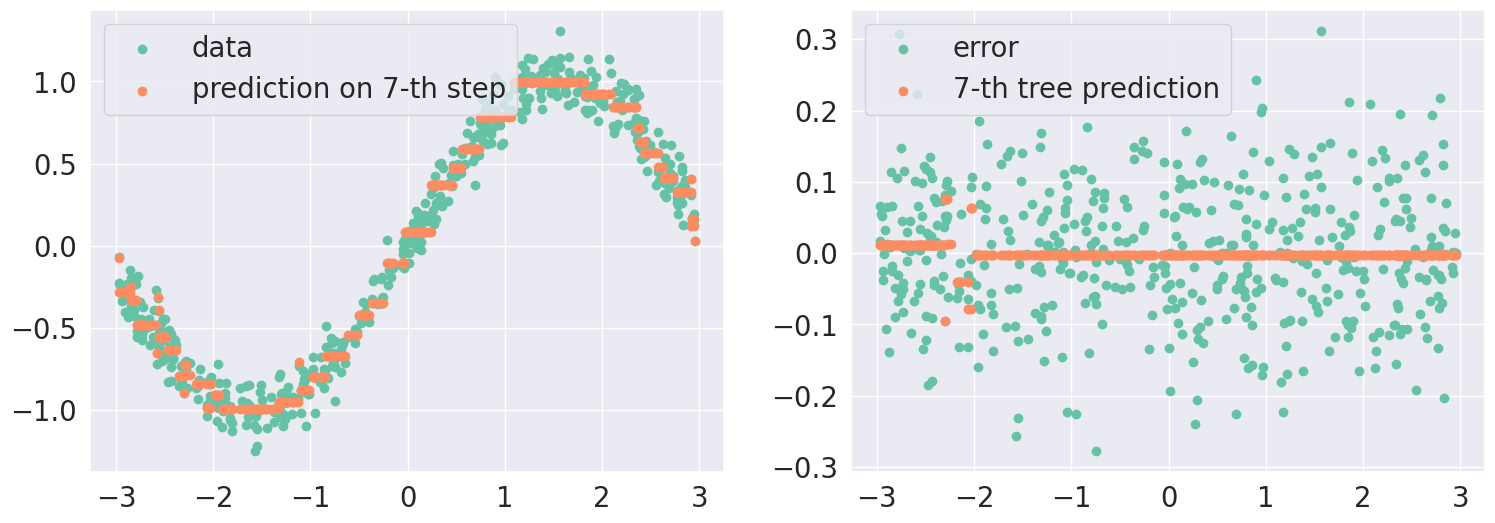

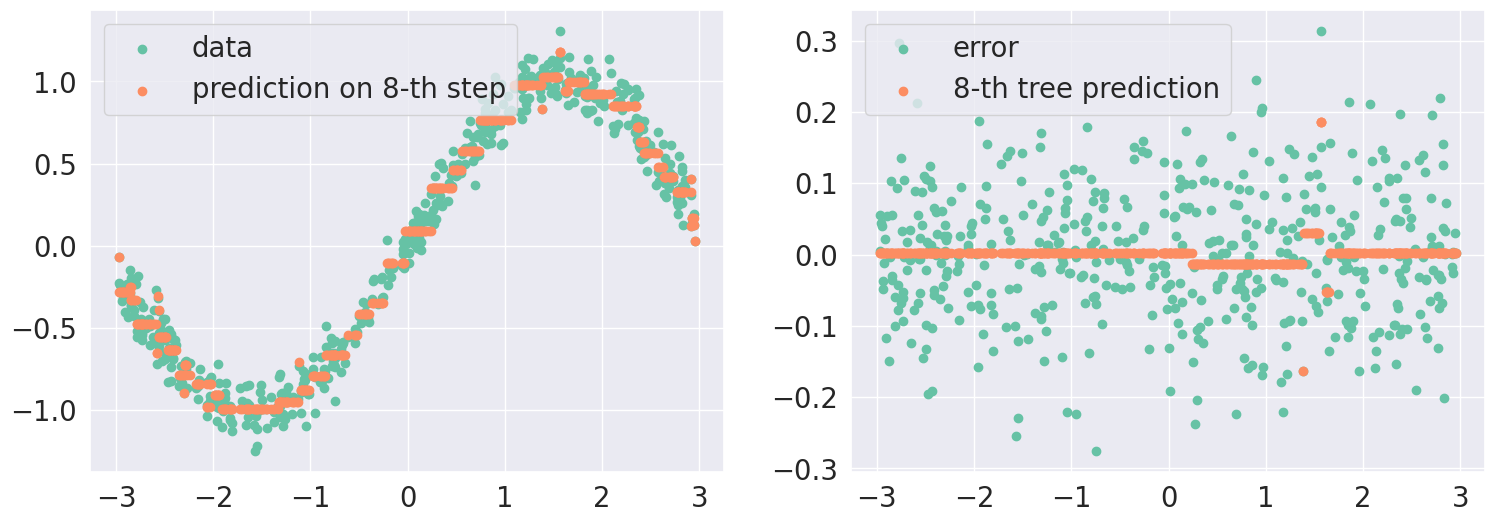

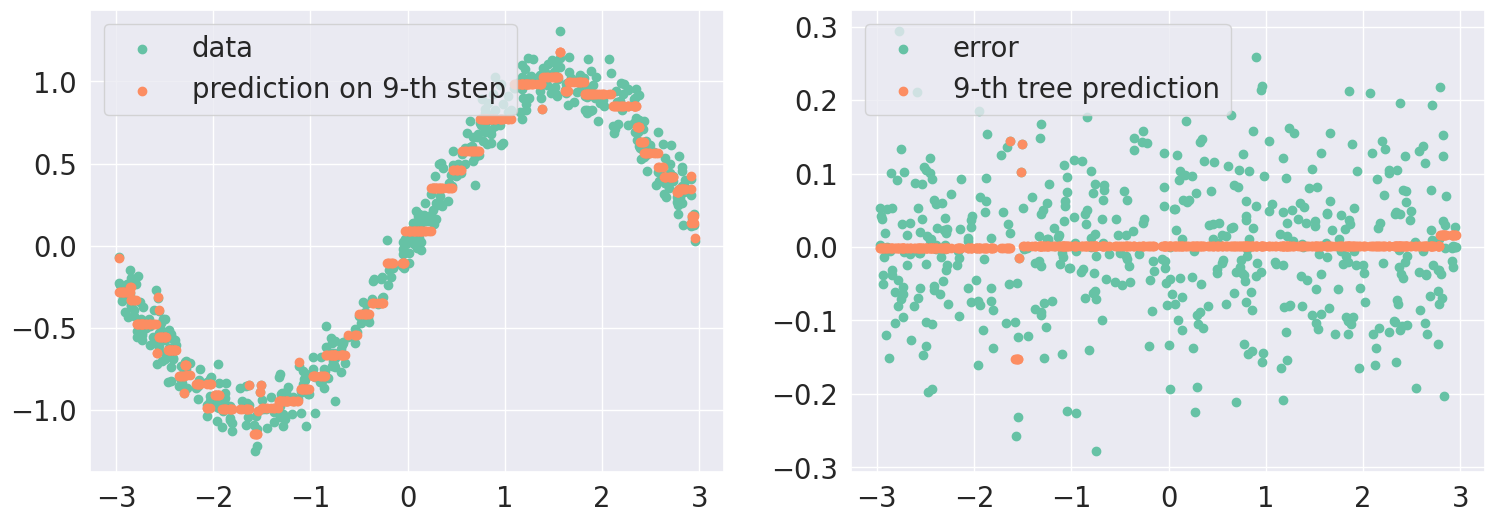

In [9]:
staged = list(regressor.staged_predict(X_train))

for i in range(10):
    if i == 0:
      previous_predict = 0
    else:
      previous_predict = staged[i-1]

    error = y_train - previous_predict
    current_step_predict = staged[i] - previous_predict

    # построение графиков
    fig, axs = plt.subplots(ncols=2, figsize=(18, 6))
    axs[0].scatter(X_train, y_train, label='data')
    axs[0].scatter(X_train, staged[i], label=f'prediction on {i}-th step')
    axs[0].legend()

    axs[1].scatter(X_train, y_train - previous_predict, label='error')
    axs[1].scatter(X_train, current_step_predict, label=f'{i}-th tree prediction')
    axs[1].legend()

Сделайте вывод. Как выглядят графики на разных шагах? Как обучается бустинг?

**Вывод:**

На первых шагах ансамбль действует как отдельное дерево, выдавая кусочно-постоянную функцию. С каждым новым шагом предсказания становятся всё более плавными.

С каждым шагом ошибка всё сильнее сосредотачивается около нуля, а предсказания каждой следующей модели всё больше напоминают прямую ``y = 0`` с небольшими "корректировками" для исправления ошибок.

Таким образом, каждая последующая модель бустинга обучается на ошибках предыдущей.